#**CSIE5732 Computer Vision, NTU, TPE**
[Homework3](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw3.html)


>Deadline : 2022-10-04

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/1xOJiRUcW2qiJNGTV-xspSusUmlKWxZRk?usp=sharing)





##Description:
###Write a program to generate images and histograms:
*   (a) original image and its histogram
*   (b) image with intensity divided by 3 and its histogram
*   (c) image after applying histogram equalization to (b) and its histogram

###Announcement
*   You may use any programming language of your choice to implement the functions required in assignment #3, provided that you do not use any library calls except for basic image IO (e.g. OpenCV).

*   Grading policy
    * Please include the histogram of the final image. (As in the previous assignment).
    * You have to draw the histogram. The part where you calculate the histogram must be done hardcored, but you may output your statistics data to a file and use auxiliary program to assist you in drawing the bar graphs, i.e., Excel, gnuplot, sigmaplot, matplotlib, matlab.
*   Hint: You can use any programing language to implement homework. However don't just call libraries, if just call libraries you will get zero point.


###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>沒有，但建議不要超過4頁。報告內容簡短扼要即可。
*   Q2: 請問這次作業中二部分，把所有亮度除以三是指無條件捨去或四捨五入嗎??
>是的，無條件捨去或四捨五入都可以哦，每個pixel都是0-255的整數。
*   Q3: 如果讀檔時的格式是彩色，即rgb值相同的三個通道，那計算 histogram 是取其中一個通道的值加總就好還是三個通道一起計算？
>如果讀檔是格式是彩色，三個通道要個別計算唷，但最後附上的 histogram 可以取一個通道代表即可。
建議直接用灰階讀檔即可。
*   Q4: 請問做出來的結果圖大概長怎樣？
>做出來的影像可以參照 HW3 封面，分別是b和c的結果圖。
*   Q5: 請問報告總共要多少張圖？
>三張圖和三張對應的直方圖共6張哦。
*   Q6: 請問可以用numpy一次處裡多個像素嗎? 像是用np.histogram, np.cumsum等函式？
>np.histogram 不能用，np.cumsum 可以。
本次希望實作 histogram equalization，故 histogram 必須手刻。
作圖的部分 可以call functions.
*   Q7: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.




##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.measurements import label
from google.colab.patches import cv2_imshow # for image display

##Step2: define the class for the six transformations
> we implement the six transformations as the private methods under the classs 'HW1'

In [ ]:
class HW3:
    def __init__(self, dirc, objc):
        self.img    = cv2.imread(dirc+objc,0)
        self.dirc    = dirc
        self.shape  = self.img.shape
        self.nRow  = self.img.shape[0]
        self.nCol   = self.img.shape[1]
        self.label   = np.zeros([self.nRow, self.nCol], dtype=int)

    def original(self):
        return self.img

    def attenuate(self, factor):
        attenuatedImg = np.zeros(self.shape, int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                attenuatedImg[rowIdx][colIdx] = self.img[rowIdx][colIdx] // factor
        return attenuatedImg

    def selfdefined_histogram(self):
        histogram = [0] * 256
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                histogram[ self.img[rowIdx][colIdx] ] += 1
        return np.array(histogram), np.array(list(range(0,256+1)))

    def histogram_equalization(self):
        totalNumberOfPixels = self.nRow * self.nCol
        s = [0] * 256
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                s [ self.img[rowIdx][colIdx] ] += 1
        for intensity in range( 1, len(s)):
            s [intensity] += s [intensity-1]
        for intensity in range( len(s)):
            s [intensity] = 255 * s [intensity] // totalNumberOfPixels

        histEqualizedImg = np.zeros(self.shape, int)
        for rowIdx in range(self.nRow):
            for colIdx in range(self.nCol):
                intensity = self.img[rowIdx][colIdx]
                histEqualizedImg [rowIdx][colIdx] = s [intensity]
        return histEqualizedImg

##Step3 Initiate an object from the class constructor

In [ ]:
dir_ = '/content/'
img_a = 'lena.bmp'
obj_a = HW3(dir_,img_a)

##Step4: Carry out the transformations

### (a) original image and its histogram
    

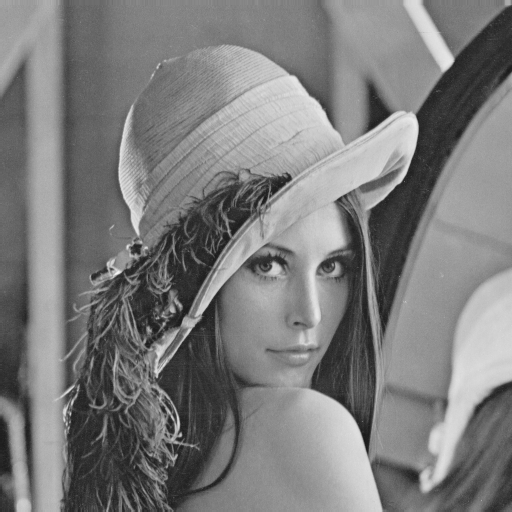

True

In [ ]:
originalImage = obj_a.original()

cv2_imshow( originalImage )
cv2.imwrite( 'a_image.bmp', originalImage )

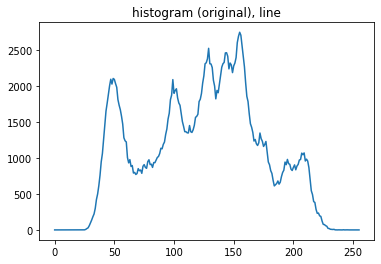

In [ ]:
histogram_a, bin_edges_a = obj_a.selfdefined_histogram()
plt.title('histogram (original), line')
plt.xlabel="intensity value"
plt.ylabel="pixel count"
plt.plot(bin_edges_a[0:-1], histogram_a)
plt.savefig('a_histogram_line.png')
plt.show()

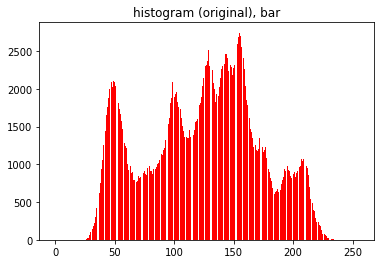

In [ ]:
    fig = plt.figure()
    plt.bar(np.arange(256), histogram_a, color='r')
    plt.title('histogram (original), bar')
    plt.savefig('a_histogram_bar.png')

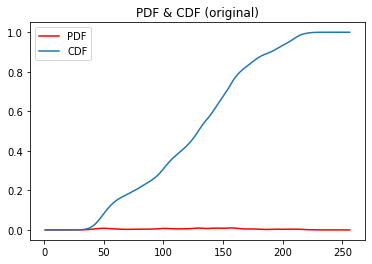

In [ ]:
pdf = histogram_a / sum(histogram_a)
cdf = np.cumsum(pdf)
# print( bin_edges_a.shape )
# print( pdf.shape )
# print( cdf.shape )
plt.plot(bin_edges_a[1:], pdf, color="red", label="PDF")
plt.plot(bin_edges_a[1:], cdf, label="CDF")
plt.title('PDF & CDF (original)')
plt.savefig('a_pdf_and_cdf.png')
plt.legend()

###(b) image with intensity divided by 3 and its histogram

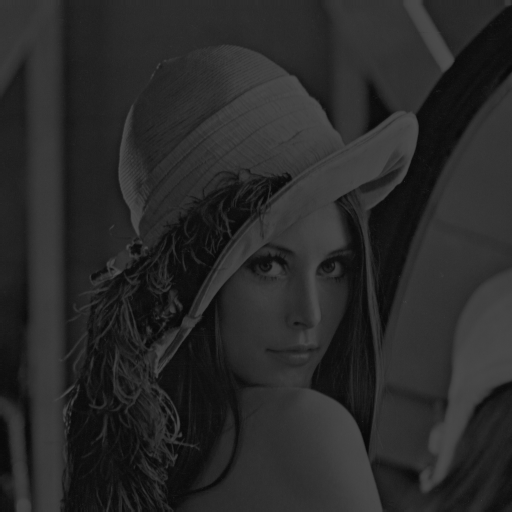

True

In [ ]:
attenuatedImage = obj_a.attenuate(3)

cv2_imshow( attenuatedImage )
cv2.imwrite( 'b_image.bmp', attenuatedImage )

In [ ]:
dir_ = '/content/'
img_b = 'b_image.bmp'
obj_b = HW3(dir_,img_b)

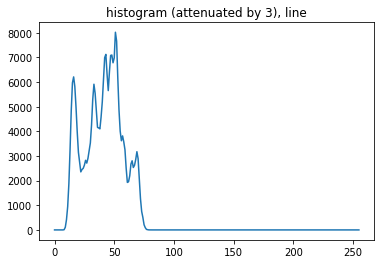

In [ ]:
histogram_b, bin_edges_b = obj_b.selfdefined_histogram()
plt.title('histogram (attenuated by 3), line')
plt.xlabel="intensity value"
plt.ylabel="pixel count"
plt.plot(bin_edges_b[0:-1], histogram_b)
plt.savefig('b_histogram_line.png')
plt.show()

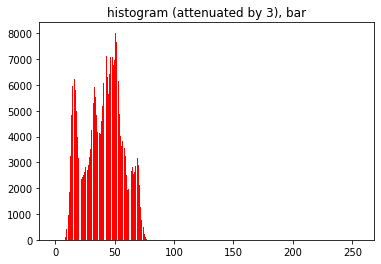

In [ ]:
    fig = plt.figure()
    plt.bar(np.arange(256), histogram_b, color='r')
    plt.title('histogram (attenuated by 3), bar')
    plt.savefig('b_histogram_bar.png')

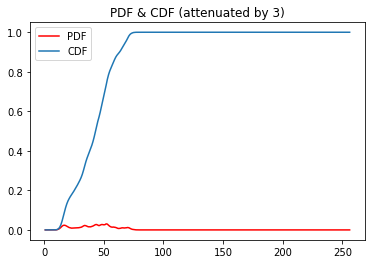

In [ ]:
pdf = histogram_b / sum(histogram_b)
cdf = np.cumsum(pdf)
# print( bin_edges_b.shape )
# print( pdf.shape )
# print( cdf.shape )
plt.plot(bin_edges_b[1:], pdf, color="red", label="PDF")
plt.plot(bin_edges_b[1:], cdf, label="CDF")
plt.title('PDF & CDF (attenuated by 3)')
plt.savefig('b_pdf_and_cdf.png')
plt.legend()

### (c) image after applying histogram equalization to (b) and its histogram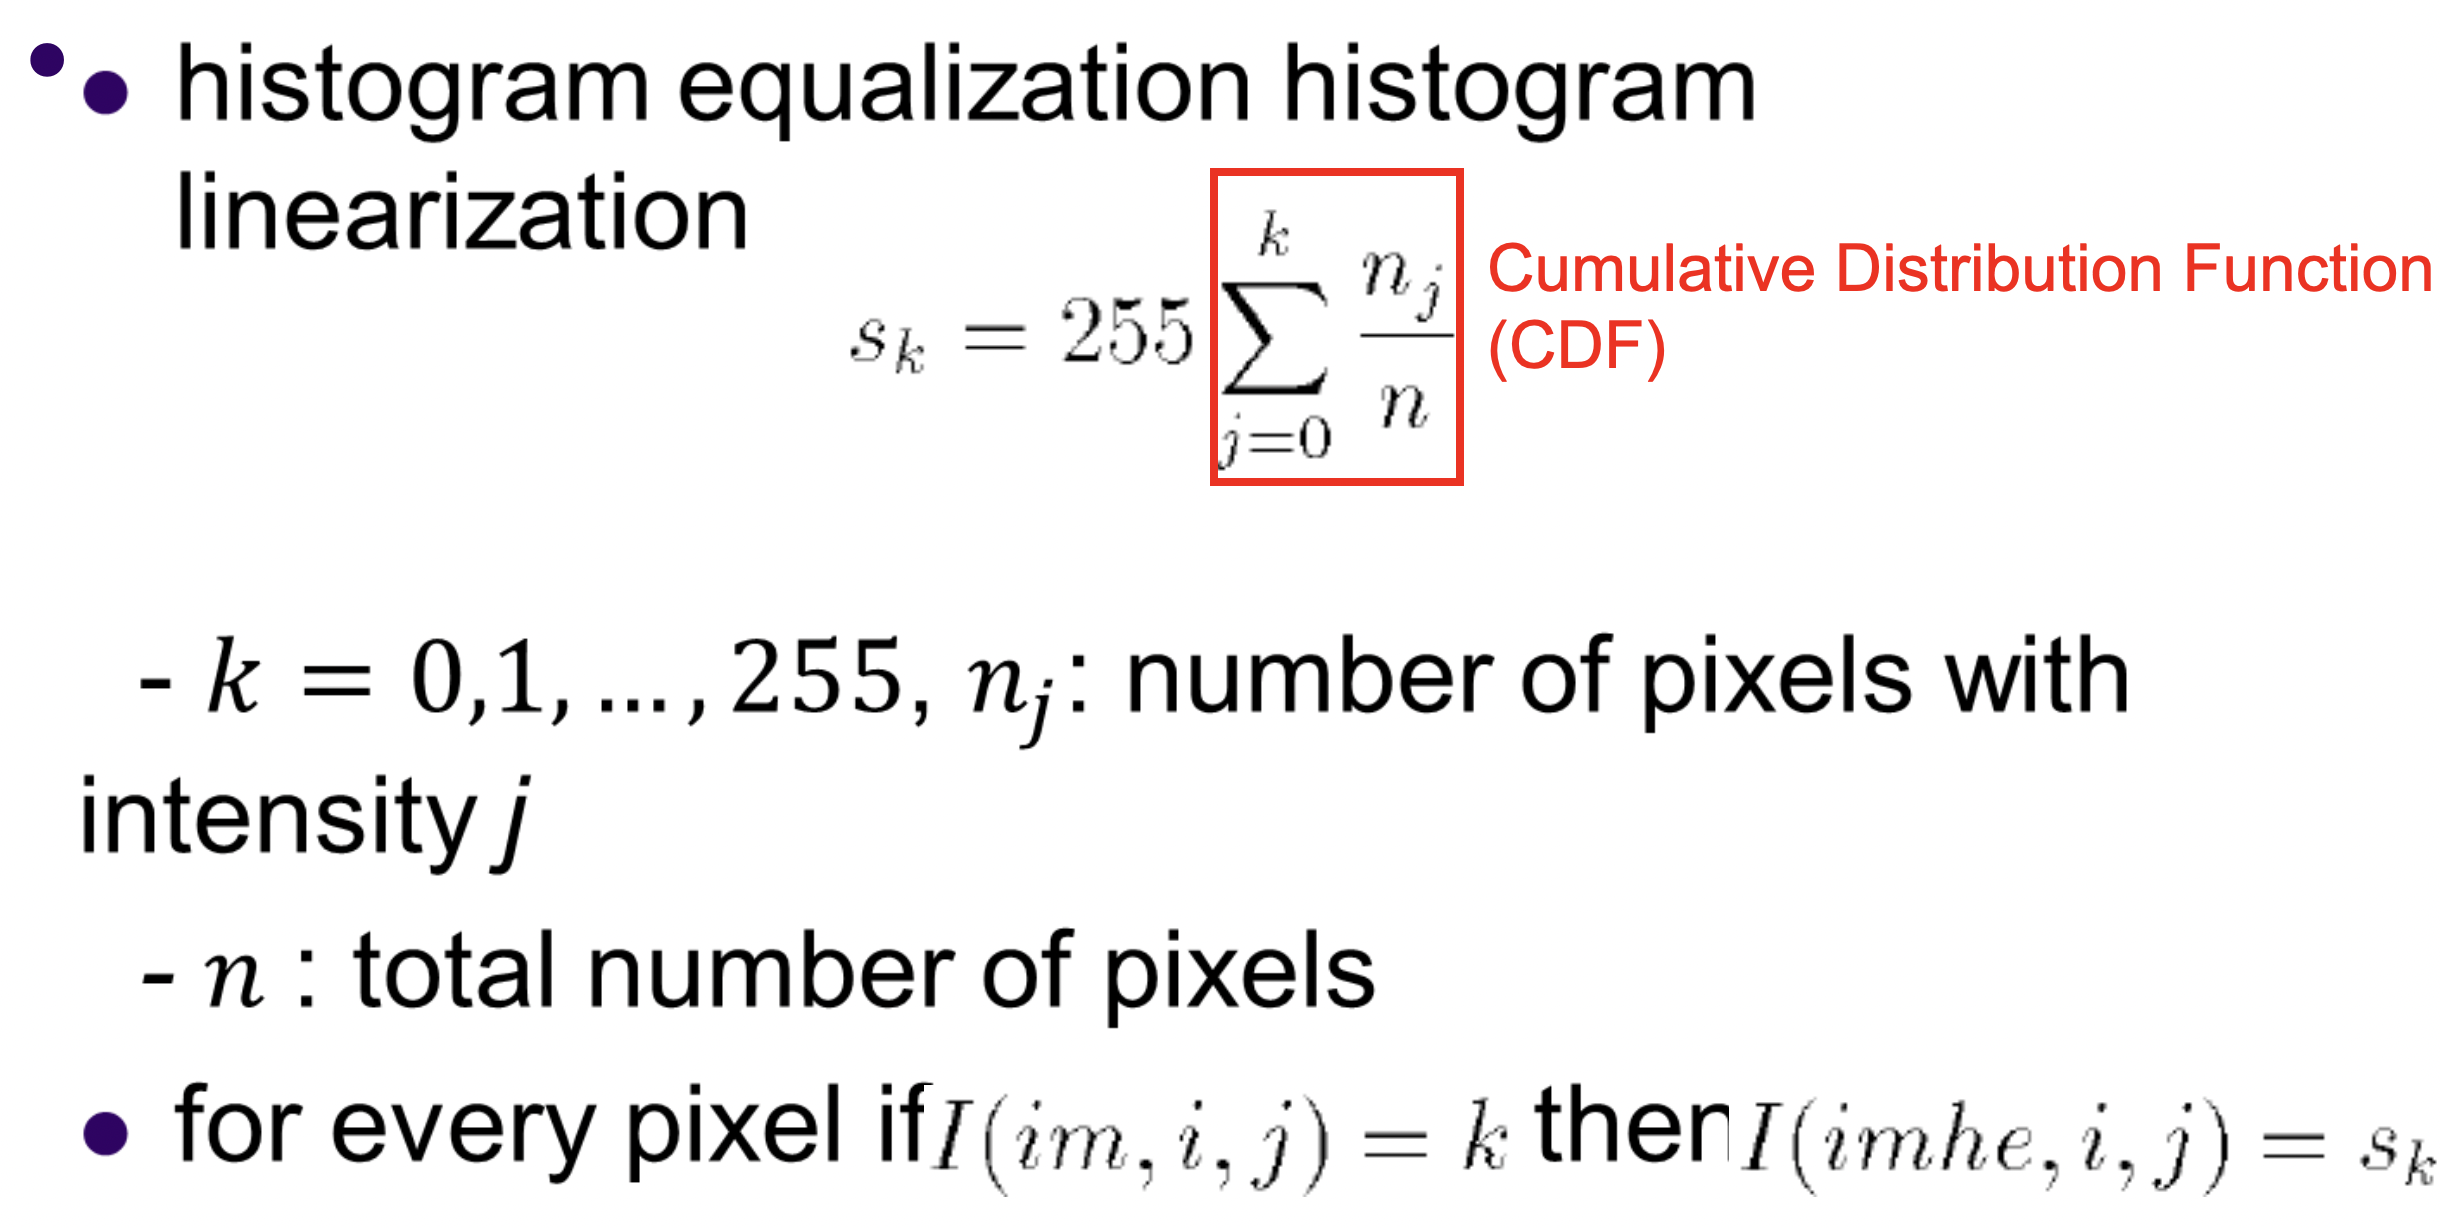

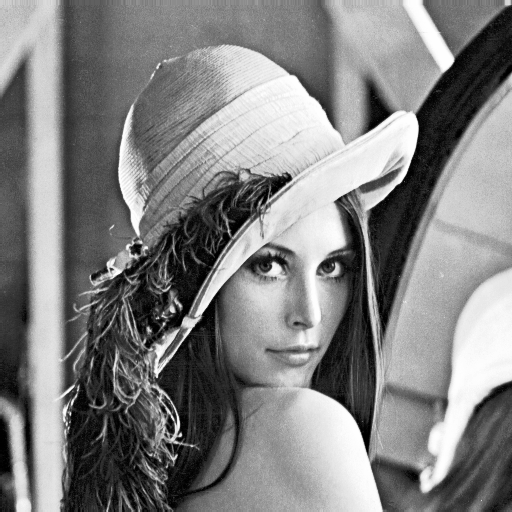

True

In [ ]:
histogramEqualizedImage = obj_b.histogram_equalization()

cv2_imshow( histogramEqualizedImage )
cv2.imwrite( 'c_image.bmp', histogramEqualizedImage )

In [ ]:
dir_ = '/content/'
img_c = 'c_image.bmp'
obj_c = HW3(dir_,img_c)

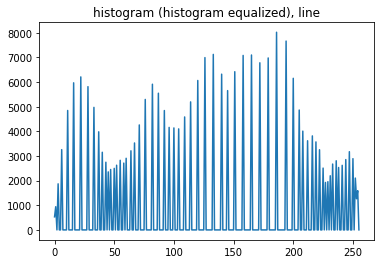

In [ ]:
histogram_c, bin_edges_c = obj_c.selfdefined_histogram()
plt.title('histogram (histogram equalized), line')
plt.xlabel="intensity value"
plt.ylabel="pixel count"
plt.plot(bin_edges_c[0:-1], histogram_c)
plt.savefig('c_histogram_line.png')
plt.show()

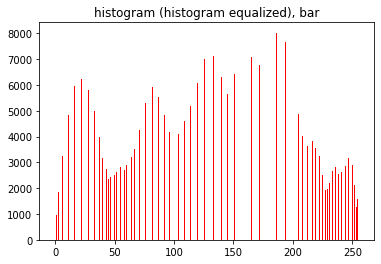

In [ ]:
    fig = plt.figure()
    plt.bar(np.arange(256), histogram_c, color='r')
    plt.title('histogram (histogram equalized), bar')
    plt.savefig('c_histogram_bar.png')

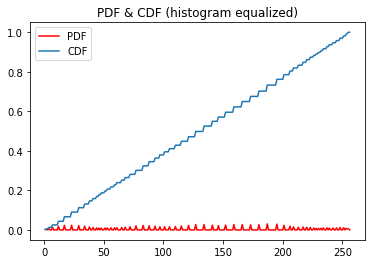

In [ ]:
pdf = histogram_c / sum(histogram_c)
cdf = np.cumsum(pdf)
# print( bin_edges_c.shape )
# print( pdf.shape )
# print( cdf.shape )
plt.plot(bin_edges_b[1:], pdf, color="red", label="PDF")
plt.plot(bin_edges_b[1:], cdf, label="CDF")
plt.title('PDF & CDF (histogram equalized)')
plt.savefig('c_pdf_and_cdf.png')
plt.legend()

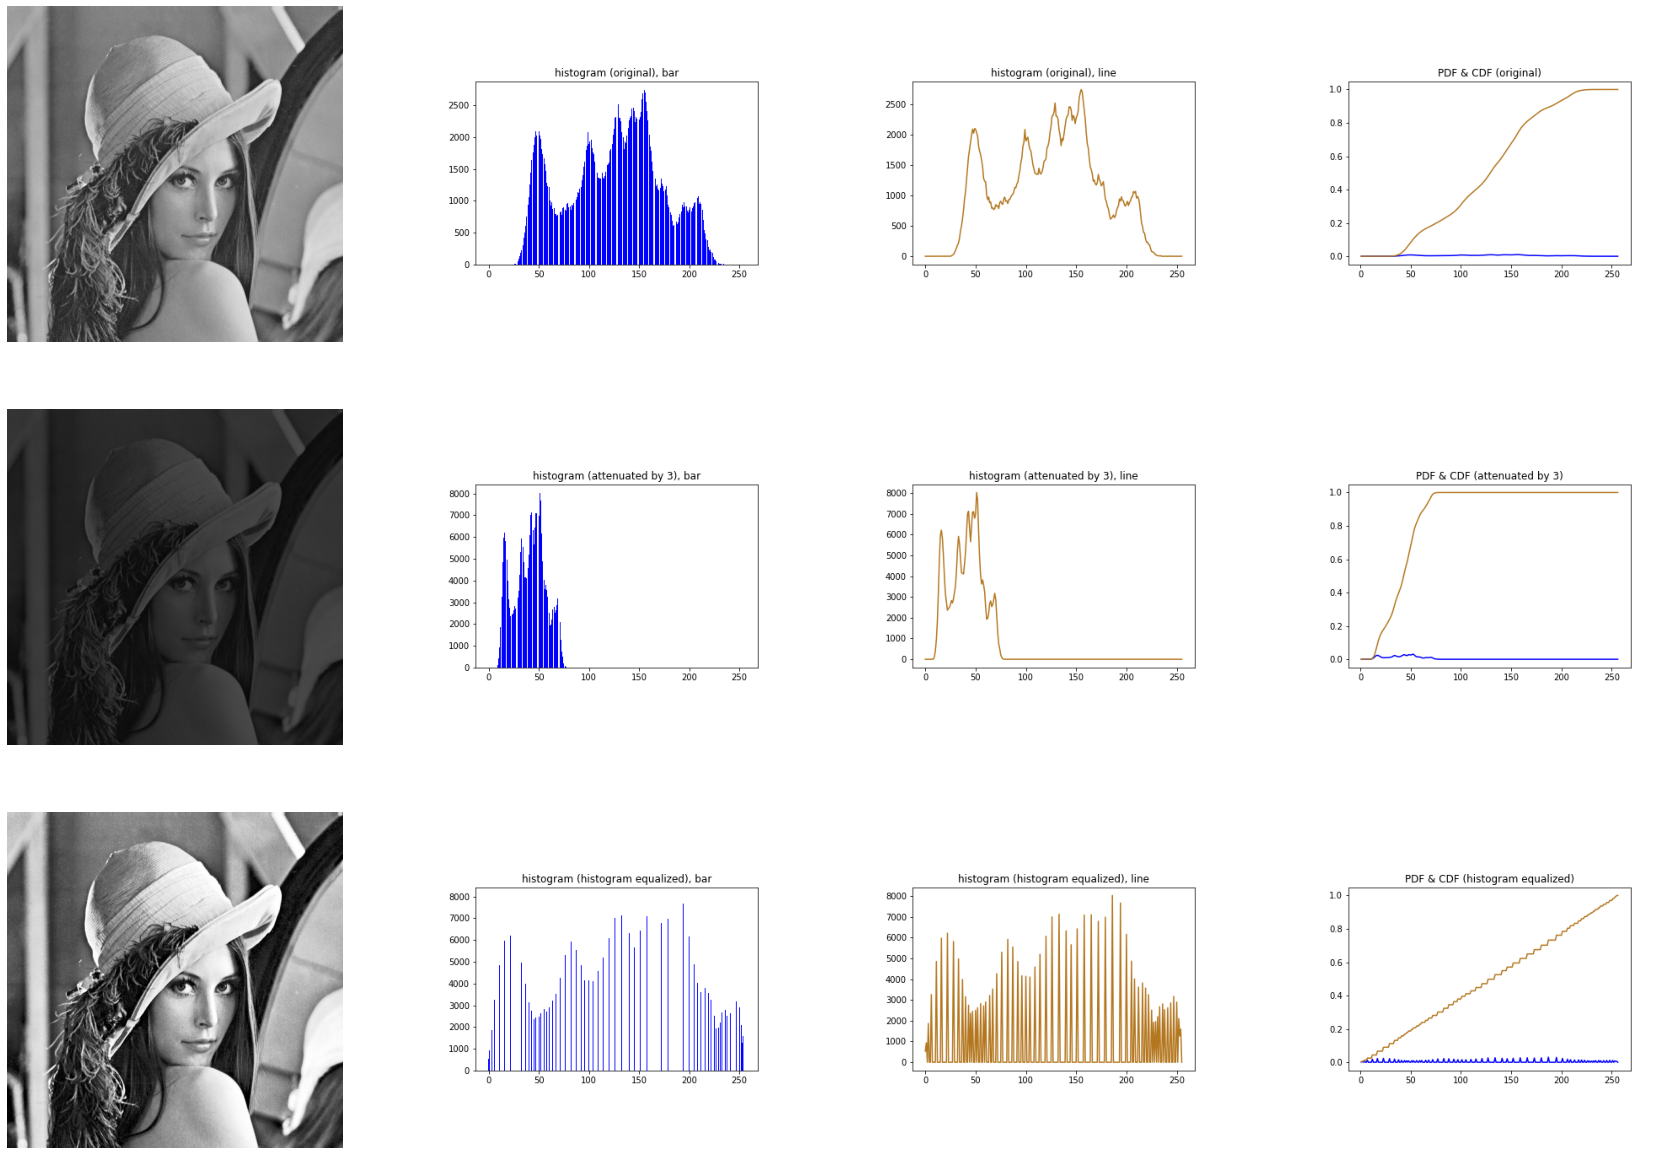

In [ ]:
# create figure
fig = plt.figure(figsize=(30, 21))

# setting values to rows and column variables
rows = 3
columns = 4

problemList = ['a','b','c']
suffixList = ['_image.bmp','_histogram_bar.png','_histogram_line.png','_pdf_and_cdf.png']

for i, element in enumerate(problemList):
    for j, suffix in enumerate(suffixList):
        fig.add_subplot(rows, columns, 4*i+j+1 )
        plt.imshow(cv2.imread(element+suffix))
        plt.axis('off')
plt.savefig('final_result.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
